<a href="https://colab.research.google.com/github/asepsae12/segmentasi-demografis-pelanggan-berdasarkan-usia-dan-jenis-kelamin/blob/main/segemntasi_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

df = pd.read_csv('/content/sample_data/dummy_customer_demographic_100_rows.csv')

df

,customer_id,date_of_birth,gender,registration_date,city
0,C001,1967-11-06,Female,2025-10-28,Bandung
1,C002,1993-10-16,Male,2025-05-23,Yogyakarta
2,C003,1980-12-13,Male,2025-10-18,Bandung
3,C004,1993-04-12,Male,2025-10-25,Semarang
4,C005,1966-01-08,Male,2023-08-12,Medan
...,...,...,...,...,...
95,C096,2007-07-21,Male,2024-05-10,Medan
96,C097,1970-02-25,Female,2024-02-28,Medan
97,C098,1979-01-19,Female,2024-10-07,Semarang
98,C099,1997-01-22,Female,2025-06-28,Yogyakarta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        100 non-null    object
 1   date_of_birth      100 non-null    object
 2   gender             100 non-null    object
 3   registration_date  100 non-null    object
 4   city               100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [ ]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['registration_date'] = pd.to_datetime(df['registration_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        100 non-null    object        
 1   date_of_birth      100 non-null    datetime64[ns]
 2   gender             100 non-null    object        
 3   registration_date  100 non-null    datetime64[ns]
 4   city               100 non-null    object        
dtypes: datetime64[ns](2), object(3)
memory usage: 4.0+ KB


In [ ]:
df.isnull().sum()

,0
customer_id,0
date_of_birth,0
gender,0
registration_date,0
city,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
today = pd.Timestamp(datetime.now().date())

today

Timestamp('2026-01-12 00:00:00')

In [ ]:
#menghitung total usia sampai saat analisis dilakukan

today = pd.Timestamp(datetime.now().date())

df['age'] = (today - df['date_of_birth']).dt.days // 365

df

,customer_id,date_of_birth,gender,registration_date,city,age
0,C001,1967-11-06,Female,2025-10-28,Bandung,58
1,C002,1993-10-16,Male,2025-05-23,Yogyakarta,32
2,C003,1980-12-13,Male,2025-10-18,Bandung,45
3,C004,1993-04-12,Male,2025-10-25,Semarang,32
4,C005,1966-01-08,Male,2023-08-12,Medan,60
...,...,...,...,...,...,...
95,C096,2007-07-21,Male,2024-05-10,Medan,18
96,C097,1970-02-25,Female,2024-02-28,Medan,55
97,C098,1979-01-19,Female,2024-10-07,Semarang,47
98,C099,1997-01-22,Female,2025-06-28,Yogyakarta,28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        100 non-null    object        
 1   date_of_birth      100 non-null    datetime64[ns]
 2   gender             100 non-null    object        
 3   registration_date  100 non-null    datetime64[ns]
 4   city               100 non-null    object        
 5   age                100 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 4.8+ KB


In [ ]:
#segmentasi usia

bins = [0, 24, 34, 44, 54, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

df

,customer_id,date_of_birth,gender,registration_date,city,age,age_group
0,C001,1967-11-06,Female,2025-10-28,Bandung,58,55+
1,C002,1993-10-16,Male,2025-05-23,Yogyakarta,32,25-34
2,C003,1980-12-13,Male,2025-10-18,Bandung,45,45-54
3,C004,1993-04-12,Male,2025-10-25,Semarang,32,25-34
4,C005,1966-01-08,Male,2023-08-12,Medan,60,55+
...,...,...,...,...,...,...,...
95,C096,2007-07-21,Male,2024-05-10,Medan,18,<25
96,C097,1970-02-25,Female,2024-02-28,Medan,55,55+
97,C098,1979-01-19,Female,2024-10-07,Semarang,47,45-54
98,C099,1997-01-22,Female,2025-06-28,Yogyakarta,28,25-34


In [ ]:
#segmentasi customer berdasarkan usia dan gender

segment = (
    df
    .groupby(['age_group', 'gender'])
    .size()
    .reset_index(name='total_customer')
)

segment

/tmp/ipython-input-4007041414.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_group', 'gender'])


,age_group,gender,total_customer
0,<25,Female,8
1,<25,Male,10
2,25-34,Female,11
3,25-34,Male,14
4,35-44,Female,10
5,35-44,Male,11
6,45-54,Female,7
7,45-54,Male,16
8,55+,Female,7
9,55+,Male,6


In [ ]:
#mengelompokan jumlah pelanggan berdasarkan rentang usia

age_count = df['age_group'].value_counts().sort_index()

age_count

,count
age_group,
<25,18
25-34,25
35-44,21
45-54,23
55+,13


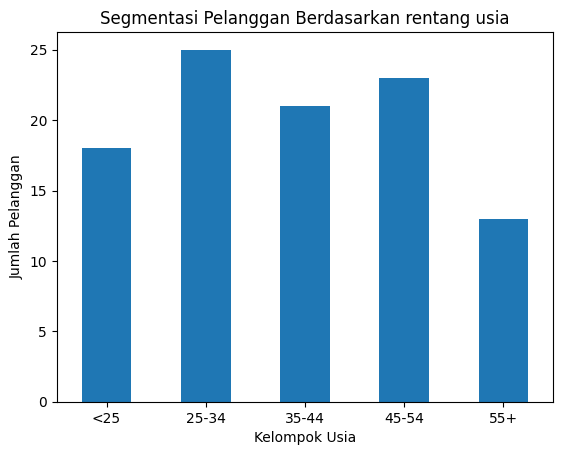

In [ ]:
age_count.plot(kind='bar')
plt.title("Segmentasi Pelanggan Berdasarkan rentang usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Hitung jumlah per kelompok usia
age_count = df['age_group'].value_counts().sort_index()

# Hitung persentase
age_percentage = (age_count / age_count.sum()) * 100

# Gabungkan ke tabel ringkasan
age_summary = pd.DataFrame({
    'age_group': age_percentage.index,
    'percentage': age_percentage.values.round(2)
})

print(age_summary)

# Kelompok usia paling dominan
majority_age = age_summary.loc[age_summary['percentage'].idxmax()]
print("\nKelompok usia paling dominan:")
print(majority_age)


  age_group  percentage
0       <25        18.0
1     25-34        25.0
2     35-44        21.0
3     45-54        23.0
4       55+        13.0

Kelompok usia paling dominan:
age_group     25-34
percentage     25.0
Name: 1, dtype: object


In [ ]:
pivot_segment = pd.pivot_table(
    df,
    values='customer_id',
    index='age_group',
    columns='gender',
    aggfunc='count',
    fill_value=0
)

pivot_segment

/tmp/ipython-input-3980209697.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_segment = pd.pivot_table(


gender,Female,Male
age_group,,
<25,8,10
25-34,11,14
35-44,10,11
45-54,7,16
55+,7,6


In [ ]:
gender_count = df['gender'].value_counts()

gender_percentage = (gender_count / gender_count.sum()) * 100

gender_percentage

,count
gender,
Male,57.0
Female,43.0


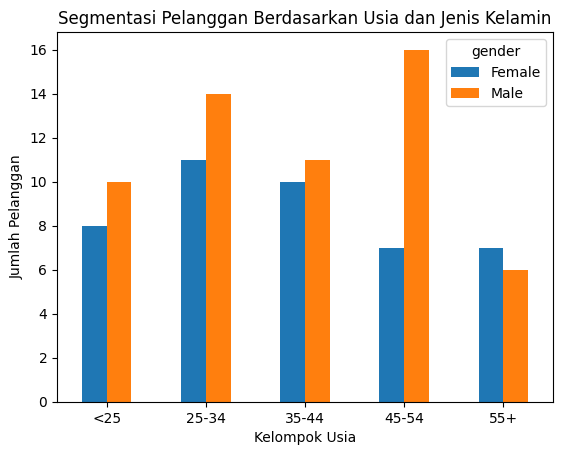

In [ ]:
pivot_segment.plot(kind='bar')
plt.title("Segmentasi Pelanggan Berdasarkan Usia dan Jenis Kelamin")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=0)
plt.show()